# ***I) NHẬP VÀ LÀM SẠCH DỮ LIỆU***

1. TẢI LÊN FILE CSV

In [3]:

# Bước này chỉ cần chạy 1 lần mỗi khi mở lại Colab
from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

 2.ĐỌC DỮ LIỆU VÀ KIỂM TRA TỔNG QUAN

In [4]:
import pandas as pd

In [5]:
# Đọc file đã tải lên (giả sử tên là 'dataset.csv')
df = pd.read_csv("dataset.csv")


In [6]:
# Kiểm tra thông tin cơ bản
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [7]:
# Xem vài dòng đầu tiên
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


3.KIỂM TRA & THỐNG KÊ DỮ LIỆU BỊ THIẾU

In [8]:
# Số lượng giá trị thiếu
missing = df.isna().sum().sort_values(ascending=False)
print("Top 10 cột bị thiếu dữ liệu:")
print(missing.head(10))

Top 10 cột bị thiếu dữ liệu:
Unnamed: 83                      91713
d1_potassium_max                  9585
d1_potassium_min                  9585
h1_mbp_noninvasive_min            9084
h1_mbp_noninvasive_max            9084
apache_4a_hospital_death_prob     7947
apache_4a_icu_death_prob          7947
h1_diasbp_noninvasive_max         7350
h1_diasbp_noninvasive_min         7350
h1_sysbp_noninvasive_max          7341
dtype: int64


In [9]:

# Thống kê mô tả cho cột số
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


4.XÓA TRÙNG LẶP

In [10]:
df = df.drop_duplicates()
print(f"Sau khi xóa trùng lặp: {df.shape}")


Sau khi xóa trùng lặp: (91713, 85)


5.XÓA CÁC CỘT KHÔNG MANG THÔNG TIN ( DUY NHẤT 1 GIÁ TRỊ )

In [11]:
constant_cols = df.nunique()[df.nunique() == 1]
df = df.drop(columns=constant_cols.index)
print("Đã xóa các cột chỉ có 1 giá trị duy nhất.")


Đã xóa các cột chỉ có 1 giá trị duy nhất.


6.LÀM SẠCH ĐỊNH DẠNG DỮ LIỆU TEXT

In [12]:
# Loại bỏ dấu, khoảng trắng thừa
df = df.replace({',': '', '    ': '', '\(': '', '\)': ''}, regex=True)

7.ÉP KIỂU CÁC CỘT NGHI NGỜ ĐANG Ở DẠNG CHUỖI NHƯNG LÀ SỐ

In [13]:
# Ví dụ: các cột từ 2 đến 7 có thể là số nhưng ở dạng object
df.iloc[:, 2:8] = df.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce')


8.XỬ LÝ DỮ LIỆU BỊ THIẾU

In [14]:
# Chia cột số và cột phân loại
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Cột số:", len(numeric_cols))
print("Cột phân loại:", len(categorical_cols))

Cột số: 78
Cột phân loại: 7


In [15]:

# Với cột số: dùng mean
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

In [16]:
# Với cột phân loại: dùng mode nếu có, nếu không → 'Unknown'
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_vals = df[col].mode()
        if not mode_vals.empty:
            df[col] = df[col].fillna(mode_vals[0])
        else:
            df[col] = df[col].fillna("Unknown")

9.CHUYỂN CÁC CỘT SANG DẠNG CATEGORY

In [17]:
for col in categorical_cols:
    if df[col].nunique() < 50:
        df[col] = df[col].astype("category")



10.GOM NHÓM NHÃN HIẾM THÀNH OTHER

In [18]:
for col in df.select_dtypes(include='category'):
    value_counts = df[col].value_counts(normalize=True)
    rare_labels = value_counts[value_counts < 0.01].index
    df[col] = df[col].replace(rare_labels, 'Other')




<ipython-input-18-dd1e418baecf>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare_labels, 'Other')
<ipython-input-18-dd1e418baecf>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare_labels, 'Other')
<ipython-input-18-dd1e418baecf>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col

11.KIỂM TRA PHÂN PHỐI NHÃ MỤC TIÊU ( NẾU CÓ )

In [19]:
if 'hospital_death' in df.columns:
    print("Tỷ lệ phân phối hospital_death:")
    print(df['hospital_death'].value_counts(normalize=True) * 100)
else:
    print("❗ Không tìm thấy cột hospital_death.")


Tỷ lệ phân phối hospital_death:
hospital_death
0    91.369817
1     8.630183
Name: proportion, dtype: float64


12. CÂN BẰNG DỮ LIỆU BẰNG SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

if 'hospital_death' in df.columns:
    X = df.drop(columns='hospital_death')
    y = df['hospital_death']

    # Encode object/category → one-hot
    X = pd.get_dummies(X, drop_first=True)

    # Chia dữ liệu train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X.fillna(0), y, stratify=y, test_size=0.2, random_state=42
    )

    # Dùng SMOTE để cân bằng class trong train set
    sm = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

    print(f"Dữ liệu train sau SMOTE: {X_train_resampled.shape}")
else:
    print("❗ Không thể SMOTE vì thiếu cột hospital_death.")


Dữ liệu train sau SMOTE: (134076, 107)


## **II) VẼ ĐỒ THỊ TRỰC QUAN (EDA)**


. Trực quan hóa dữ liệu (EDA)
    2.1 Phân phối tử vong tổng thể
    2.2 Heatmap tương quan
    2.3 Histogram chỉ số sinh lý
    2.4 GCS theo tử vong
    2.5 Phân tích hệ cơ quan (apache_2_bodysystem)
    2.6 Phân tích ICU
    2.7 phân tích tuổi
    2.8 Tỷ lệ tử vong theo bệnh nền


1.IMPORT THƯ VIỆN VÀ VẼ BIỂU ĐỒ

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt mặc định đẹp hơn
sns.set(style="whitegrid")


2. VẼ BIỂU ĐỒ PHÂN PHỐI CHUẨN Hospital_death

<ipython-input-22-8a944a7c6f55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hospital_death', palette='Set2')


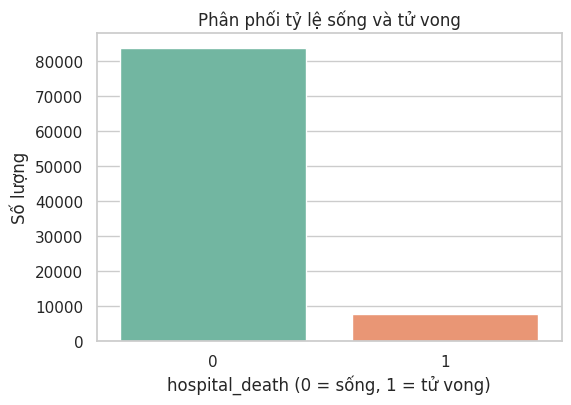

In [22]:
if 'hospital_death' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='hospital_death', palette='Set2')
    plt.title("Phân phối tỷ lệ sống và tử vong")
    plt.xlabel("hospital_death (0 = sống, 1 = tử vong)")
    plt.ylabel("Số lượng")
    plt.show()
else:
    print("❗ Không tìm thấy cột hospital_death để vẽ.")


3.BIỂU ĐỒ HEATMAP TƯƠNG QUAN GIỮA CÁC BIẾN SỐ

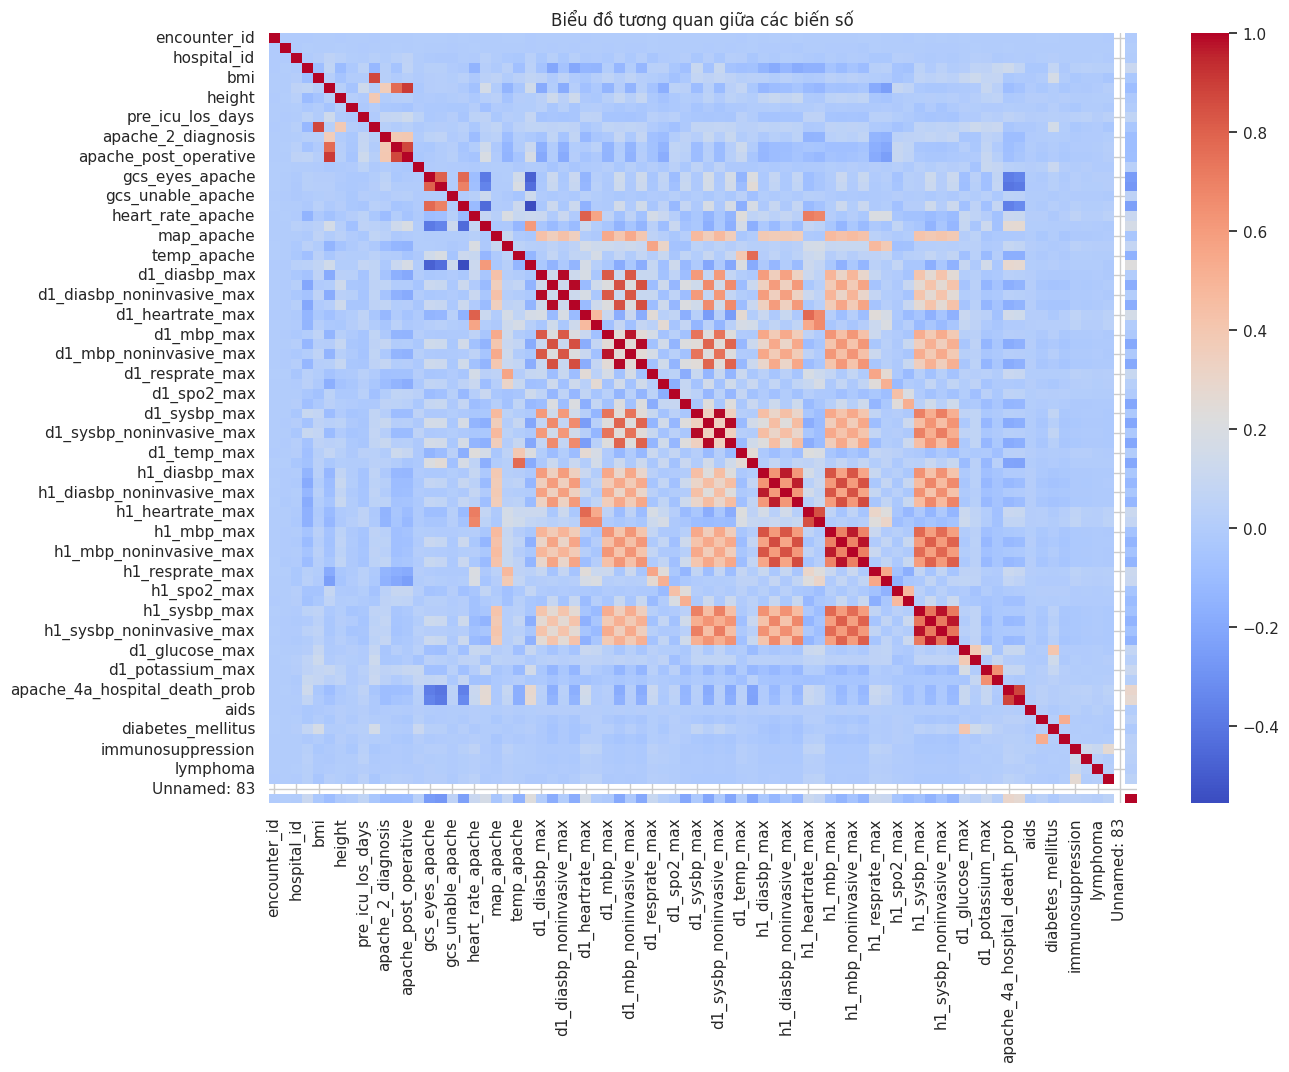

In [23]:
# Chỉ vẽ tương quan cho các biến số
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Biểu đồ tương quan giữa các biến số")
plt.show()


4.VẼ HISTOGRAM (PHÂN PHỐI)CHO MỘT SỐ CHỈ SỐ SINH LÝ QUAN TRỌNG

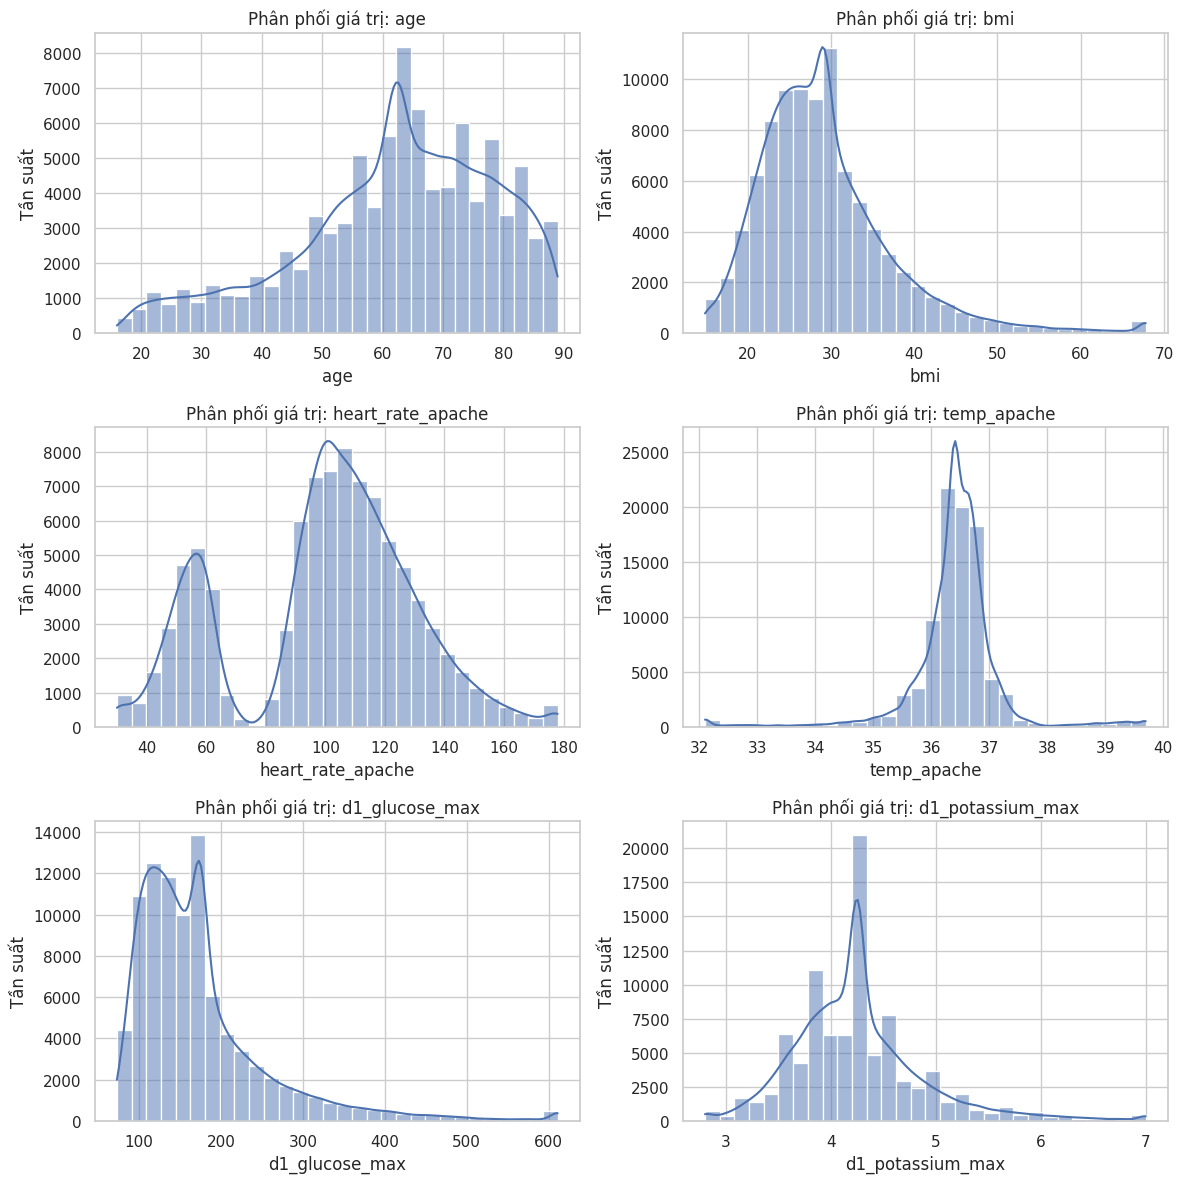

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách biến cần vẽ
features = ['age', 'bmi', 'heart_rate_apache', 'temp_apache', 'd1_glucose_max', 'd1_potassium_max']

# Thiết lập số cột mỗi hàng
cols = 2
rows = (len(features) + 1) // cols

# Tạo figure và lưới các subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()  # Làm phẳng mảng axes để dễ truy cập

# Vẽ từng biểu đồ
for i, col in enumerate(features):
    if col in df.columns:
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f"Phân phối giá trị: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Tần suất")

# Ẩn subplot trống nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


5.VẼ PHÂN PHỐI GCS THEO TỪNG NHÓM TỬ VONG

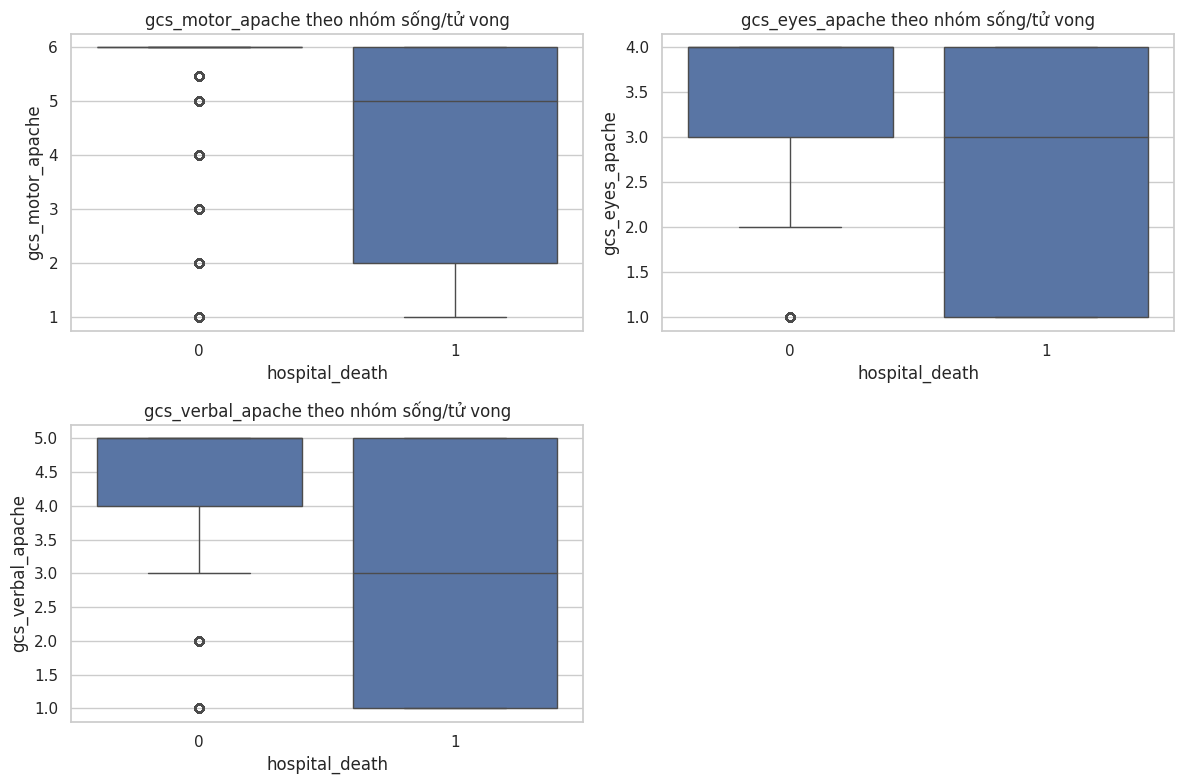

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách biến GCS
gcs_features = ['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache']

# Số cột mỗi hàng
cols = 2
rows = (len(gcs_features) + 1) // cols

# Tạo lưới các subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

# Vẽ từng boxplot
for i, col in enumerate(gcs_features):
    if col in df.columns:
        sns.boxplot(data=df, x='hospital_death', y=col, ax=axes[i])
        axes[i].set_title(f"{col} theo nhóm sống/tử vong")
        axes[i].set_xlabel("hospital_death")
        axes[i].set_ylabel(col)

# Ẩn các ô trống nếu không đủ biến để vẽ
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


6.VẼ BIỂU ĐỒ CHUYÊN ĐỀ THEO TỪNG HỆ THỐNG CƠ QUAN (APACHE)

<ipython-input-26-6f59f6a191e8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='apache_2_bodysystem', palette="Set3", ax=ax1)
<ipython-input-26-6f59f6a191e8>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


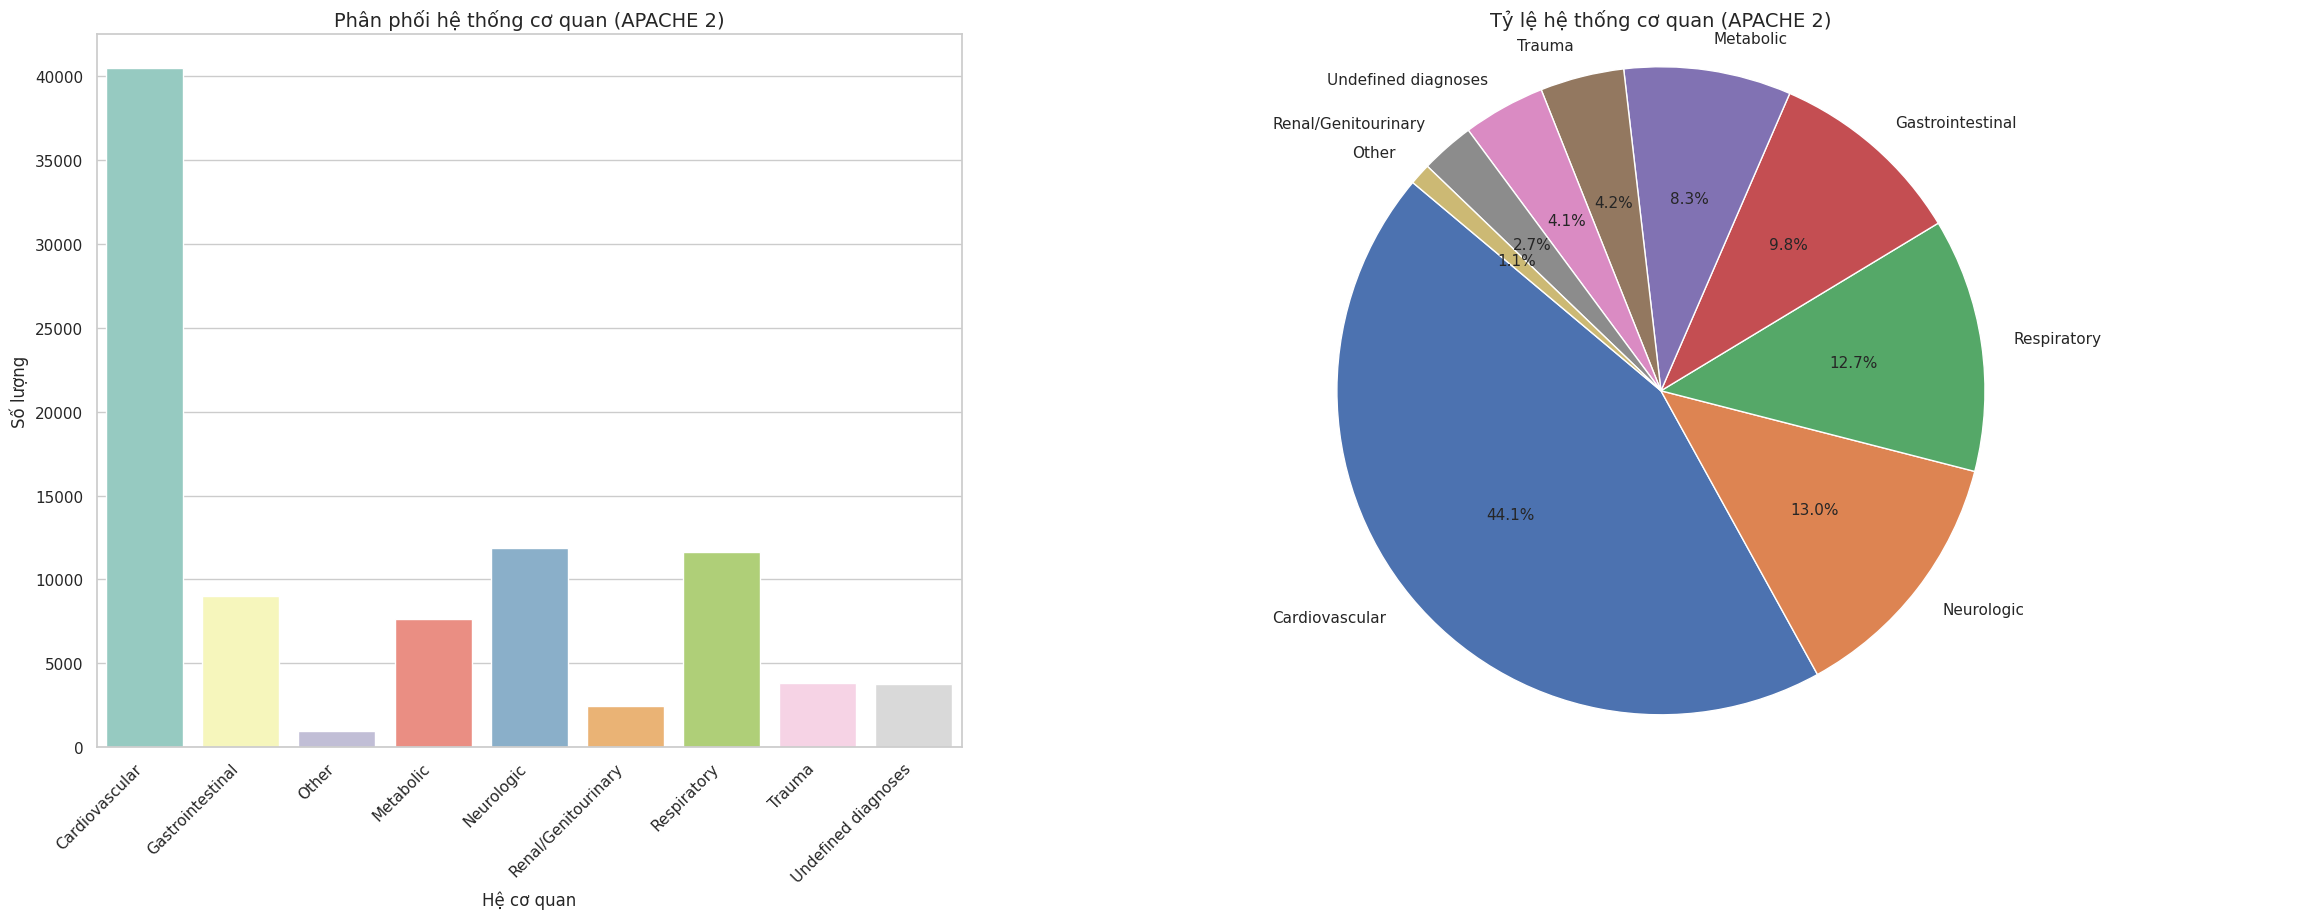

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'apache_2_bodysystem' in df.columns:
    # Chuẩn bị dữ liệu
    body_counts = df['apache_2_bodysystem'].value_counts()

    # Tạo bố cục với GridSpec để mở rộng vùng biểu đồ tròn
    from matplotlib.gridspec import GridSpec

    fig = plt.figure(figsize=(24, 10))
    gs = GridSpec(1, 2, width_ratios=[2, 3])  # tỉ lệ giữa bar chart : pie chart

    # Biểu đồ cột
    ax1 = fig.add_subplot(gs[0])
    sns.countplot(data=df, x='apache_2_bodysystem', palette="Set3", ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_title("Phân phối hệ thống cơ quan (APACHE 2)", fontsize=14)
    ax1.set_xlabel("Hệ cơ quan", fontsize=12)
    ax1.set_ylabel("Số lượng", fontsize=12)

    # Biểu đồ tròn – với đường kính lớn hơn
    ax2 = fig.add_subplot(gs[1])
    wedges, texts, autotexts = ax2.pie(
        body_counts,
        labels=body_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 11}
    )
    ax2.set_title("Tỷ lệ hệ thống cơ quan (APACHE 2)", fontsize=14)
    ax2.axis('equal')  # Giữ hình tròn

    plt.tight_layout(pad=3.0)
    plt.show()


7.BIỂU ĐỒ BOXPLOT TUỔI THEO NHÓM TỬ VONG

<ipython-input-27-245787285e24>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-27-245787285e24>:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


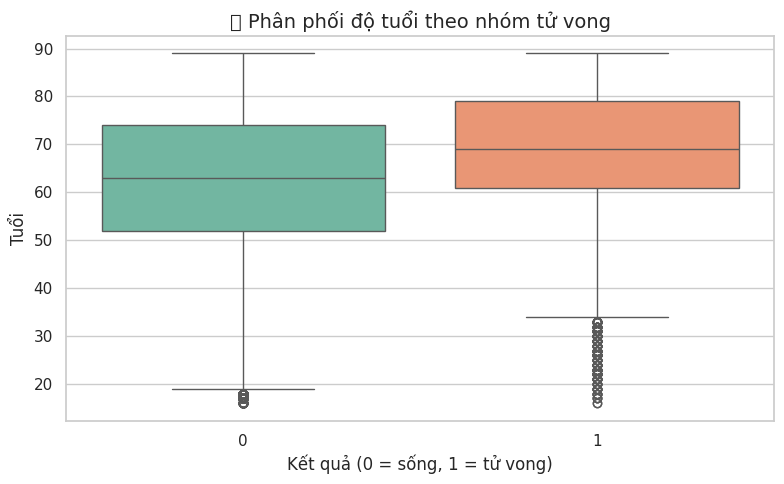

In [27]:
# 📊 Boxplot phân phối độ tuổi giữa nhóm sống và tử vong
# ✅ Mục tiêu: Kiểm tra xem nhóm tuổi có ảnh hưởng đến tỷ lệ tử vong không

import matplotlib.pyplot as plt
import seaborn as sns

if 'age' in df.columns:
    # Tạo khung hình rộng hơn giúp dễ đọc
    plt.figure(figsize=(8, 5))

    # Vẽ biểu đồ hộp (boxplot) so sánh phân phối tuổi giữa 2 nhóm
    sns.boxplot(
        data=df,
        x='hospital_death',    # Nhóm sống/tử vong
        y='age',               # Tuổi cần so sánh
        palette='Set2'         # Màu nhẹ, dễ nhìn
    )

    # Thiết lập tiêu đề và nhãn trục
    plt.title("📊 Phân phối độ tuổi theo nhóm tử vong", fontsize=14)
    plt.xlabel("Kết quả (0 = sống, 1 = tử vong)", fontsize=12)
    plt.ylabel("Tuổi", fontsize=12)

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()
else:
    print("❗ Không tìm thấy cột 'age' trong dữ liệu.")


8.TỶ LỆ TỬ VNG THEO LOẠI ICU

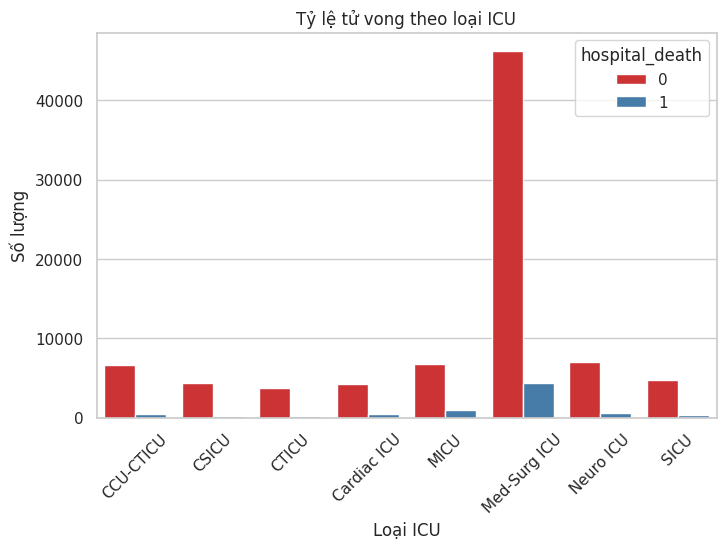

In [28]:
if 'icu_type' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='icu_type', hue='hospital_death', palette='Set1')
    plt.title("Tỷ lệ tử vong theo loại ICU")
    plt.xlabel("Loại ICU")
    plt.ylabel("Số lượng")
    plt.xticks(rotation=45)
    plt.legend(title='hospital_death')
    plt.show()


9. TỬ VONG THEO BỆNH NỀN (DIABTES,UNG THƯ)

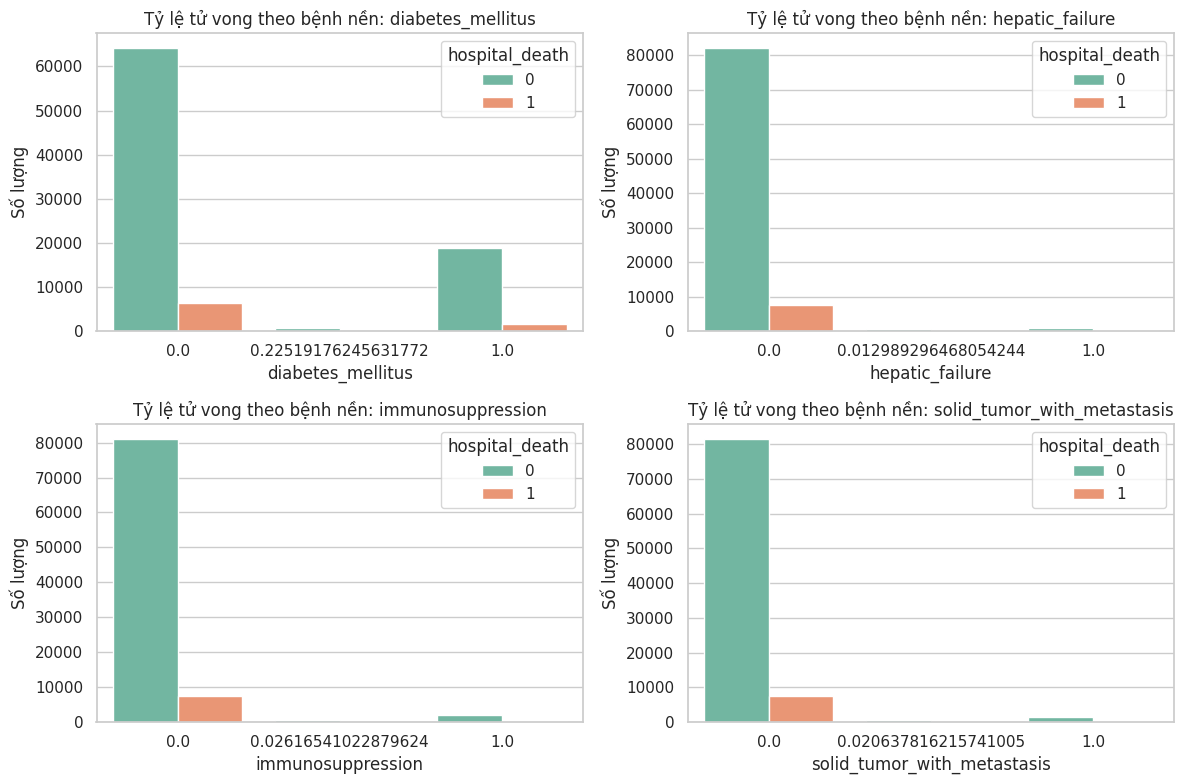


📋 Tổng hợp theo bệnh nền: diabetes_mellitus
   diabetes_mellitus  Tổng BN  Tử vong  Tỷ lệ tử vong (%)
0               0.00    70506     6235               8.84
1               0.23      715       85              11.89
2               1.00    20492     1595               7.78

📋 Tổng hợp theo bệnh nền: hepatic_failure
   hepatic_failure  Tổng BN  Tử vong  Tỷ lệ tử vong (%)
0             0.00    89816     7616               8.48
1             0.01      715       85              11.89
2             1.00     1182      214              18.10

📋 Tổng hợp theo bệnh nền: immunosuppression
   immunosuppression  Tổng BN  Tử vong  Tỷ lệ tử vong (%)
0               0.00    88617     7446               8.40
1               0.03      715       85              11.89
2               1.00     2381      384              16.13

📋 Tổng hợp theo bệnh nền: solid_tumor_with_metastasis
   solid_tumor_with_metastasis  Tổng BN  Tử vong  Tỷ lệ tử vong (%)
0                         0.00    89120     7483        

<ipython-input-31-13a128d50431>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_death_rates.keys()), y=list(avg_death_rates.values()), palette='Reds')


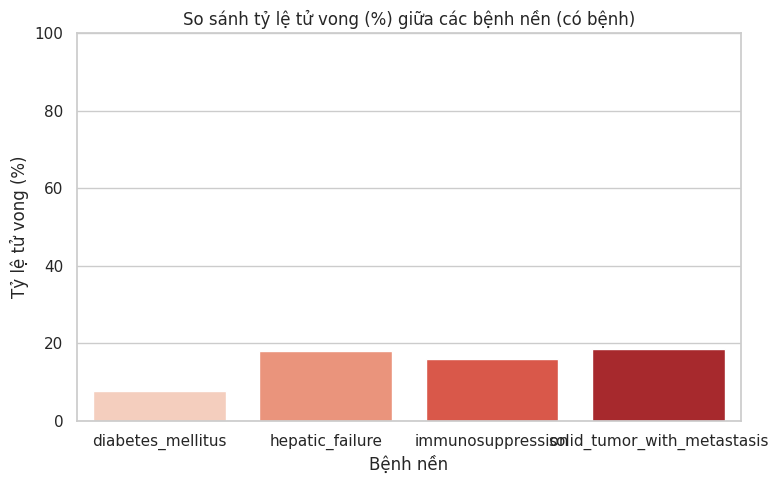

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các biến bệnh nền
disease_features = ['diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'solid_tumor_with_metastasis']

# Cấu hình số biểu đồ mỗi hàng
cols = 2
rows = (len(disease_features) + 1) // cols

# Tạo grid biểu đồ
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()  # Làm phẳng để truy cập dễ hơn

# Vẽ từng biểu đồ vào lưới
for i, col in enumerate(disease_features):
    if col in df.columns:
        sns.countplot(data=df, x=col, hue='hospital_death', palette='Set2', ax=axes[i])
        axes[i].set_title(f"Tỷ lệ tử vong theo bệnh nền: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Số lượng")
        axes[i].legend(title='hospital_death')

# Ẩn biểu đồ rỗng nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Canh chỉnh khoảng cách
plt.tight_layout()
plt.show()

# 🔍 Thống kê chi tiết tỷ lệ tử vong (%) theo từng bệnh nền
for col in disease_features:
    if col in df.columns:
        summary = df.groupby(col)['hospital_death'].agg(['count', 'sum', 'mean']).reset_index()
        summary['mean'] = summary['mean'] * 100
        summary.columns = [col, 'Tổng BN', 'Tử vong', 'Tỷ lệ tử vong (%)']
        print(f"\n📋 Tổng hợp theo bệnh nền: {col}")
        print(summary.round(2))


# So sánh tỷ lệ tử vong giữa các bệnh nền
avg_death_rates = {}

for col in disease_features:
    if col in df.columns:
        rate = df.groupby(col)['hospital_death'].mean()[1] * 100  # Lấy tỷ lệ tử vong nhóm có bệnh
        avg_death_rates[col] = rate

plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_death_rates.keys()), y=list(avg_death_rates.values()), palette='Reds')
plt.title("So sánh tỷ lệ tử vong (%) giữa các bệnh nền (có bệnh)")
plt.ylabel("Tỷ lệ tử vong (%)")
plt.xlabel("Bệnh nền")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



10.IN VÀ LƯU LẠI DỮ LIỆU SAU KHI LÀM SẠCH

In [44]:


# Xem 10 dòng đầu tiên của dữ liệu đã làm sạch
print("Dữ liệu sau khi làm sạch:")
display(df.head(10))

# In kích thước của dataframe
print("Kích thước dữ liệu:", df.shape)

# Kiểm tra số lượng giá trị thiếu trong từng cột
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isna().sum())

# Lưu file CSV đã làm sạch
df.to_csv("cleaned_dataset.csv", index=False)
print("\n✅ Dữ liệu đã được lưu thành công vào file 'cleaned_dataset.csv'")

# Tải file về máy người dùng
from google.colab import files
files.download("cleaned_dataset.csv")


Dữ liệu sau khi làm sạch:


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Unknown,Unknown,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Unknown,Unknown,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Unknown,Unknown,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Unknown,Unknown,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,29.185818,0,Unknown,Unknown,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
5,33181,74489,83,67.0,27.560000,0,Unknown,Unknown,190.5,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0
6,82208,49526,83,59.0,57.450000,0,Unknown,Unknown,165.1,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
7,120995,50129,33,70.0,29.185818,0,Unknown,Unknown,165.0,Accident & Emergency,...,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
8,80471,10577,118,45.0,29.185818,0,Unknown,Unknown,170.2,Other Hospital,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1
9,42871,90749,118,50.0,25.710000,0,Unknown,Unknown,175.3,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0


Kích thước dữ liệu: (91713, 85)
Số lượng giá trị thiếu trong mỗi cột:
encounter_id                       0
patient_id                         0
hospital_id                        0
age                                0
bmi                                0
                               ...  
solid_tumor_with_metastasis        0
apache_3j_bodysystem               0
apache_2_bodysystem                0
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

✅ Dữ liệu đã được lưu thành công vào file 'cleaned_dataset.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***III) TIỀN XỬ LÝ DỮ LIỆU CHO MÔ HÌNH HỌC MÁY ***

# 📘 CHƯƠNG 3: TIỀN XỬ LÝ DỮ LIỆU CHO MÔ HÌNH HỌC MÁY(tóm tắt)

Trong chương này, chúng ta sẽ thực hiện các bước chuẩn bị dữ liệu từ file đã làm sạch, để đưa vào mô hình học máy một cách hiệu quả. Gồm:

1. Nạp lại dữ liệu đã làm sạch
2. Tách đặc trưng (X) và nhãn mục tiêu (y)
3. Mã hóa các biến phân loại
4. Chuẩn hóa dữ liệu
5. Chia dữ liệu train/test
6. Cân bằng dữ liệu bằng SMOTE

3.1 NẠP LẠI DỮ LIỆU ĐÃ LÀM SẠCH

In [45]:
# 3.1 - Tải file cleaned_dataset.csv từ máy tính lên Colab
from google.colab import files
uploaded = files.upload()


Saving cleaned_dataset.csv to cleaned_dataset (1).csv


In [46]:
# Đọc file CSV vào DataFrame
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")
print("Kích thước dữ liệu đã nạp:", df.shape)
df.head()


Kích thước dữ liệu đã nạp: (91713, 85)


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Unknown,Unknown,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Unknown,Unknown,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Unknown,Unknown,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Unknown,Unknown,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,29.185818,0,Unknown,Unknown,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


3.2 TÁCH ĐẶC TRƯNG ĐẦU VÀO (X) VÀ NHÃN MỤC TIÊU (Y)

In [48]:
# Chọn các đặc trưng và biến mục tiêu
selected_features = [
    'age', 'gender', 'bmi', 'apache_4a_hospital_death_prob',
    'heart_rate_apache', 'map_apache', 'temp_apache',
    'd1_glucose_max', 'd1_potassium_max',
    'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
    'diabetes_mellitus', 'hepatic_failure',
    'immunosuppression', 'solid_tumor_with_metastasis',
    'icu_type', 'apache_2_bodysystem'
]

X = df[selected_features]
y = df['hospital_death']  # biến mục tiêu nhị phân: 0=sống, 1=tử vong


3.3 MÃ HÓA BIẾN PHÂN LOẠI BẰNG ONE-HOT ENCODING

In [49]:
# One-hot encode các biến phân loại
X = pd.get_dummies(X, drop_first=True)


3.4 CHUẨN HÓA DỮ LIỆU VỚI STANDARDSCALER

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Đưa về lại DataFrame để dễ quan sát
X = pd.DataFrame(X_scaled, columns=X.columns)


3.5 CHIA DỮ LIỆU ĐỂ TRAIN/TEST

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Dữ liệu huấn luyện:", X_train.shape)
print("Dữ liệu kiểm tra:", X_test.shape)


Dữ liệu huấn luyện: (73370, 30)
Dữ liệu kiểm tra: (18343, 30)


3.6 CÂN BẰNG DỮ LIỆU BẰNG SMOTE

In [52]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Dữ liệu huấn luyện sau SMOTE:", X_train_resampled.shape)
print("Tỷ lệ tử vong sau SMOTE: {:.2f}%".format(y_train_resampled.mean() * 100))


Dữ liệu huấn luyện sau SMOTE: (134076, 30)
Tỷ lệ tử vong sau SMOTE: 50.00%


3.7 LƯU TRỮ SAU TIỀN XỬ LÝ


In [53]:
# Lưu các tập dữ liệu đã sẵn sàng cho mô hình
X_train_resampled.to_csv("X_train_model_ready.csv", index=False)
y_train_resampled.to_csv("y_train_model_ready.csv", index=False)
X_test.to_csv("X_test_model_ready.csv", index=False)
y_test.to_csv("y_test_model_ready.csv", index=False)
print("Đã lưu tất cả các file dữ liệu sau tiền xử lý.")


Đã lưu tất cả các file dữ liệu sau tiền xử lý.


In [54]:
from google.colab import files

# Tải từng file xuống máy
files.download("X_train_model_ready.csv")
files.download("y_train_model_ready.csv")
files.download("X_test_model_ready.csv")
files.download("y_test_model_ready.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***IV) HUẤN LUYỆN MÔ HÌNH  LOGISTIC REGRESSION (MÔ HÌNH CƠ BẢN)***


# 📘 CHƯƠNG 4: HUẤN LUYỆN MÔ HÌNH LOGISTIC REGRESSION (MÔ HÌNH CƠ BẢN) TÓM TẮT

Trong chương này, chúng ta sẽ:
1. Khởi tạo mô hình Logistic Regression
2. Huấn luyện mô hình trên dữ liệu đã được tiền xử lý
3. Dự đoán trên tập kiểm tra
4. Đánh giá hiệu suất bằng các chỉ số: Accuracy, Precision, Recall, F1-score
5. Vẽ ma trận nhầm lẫn (Confusion Matrix)

4.1 KHỞI TẠO VÀ HUẤN LUYỆN MÔ HÌNH LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Huấn luyện mô hình trên tập train đã cân bằng
log_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

4.2 DỰ ĐOÁN TRÊN TẬP KIỂM TRA

In [56]:
# Dự đoán kết quả trên tập test
y_pred = log_model.predict(X_test)


4.3 ĐÁNH GIÁ MÔ HÌNH

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# In các chỉ số đánh giá
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))

# Báo cáo chi tiết
print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7717
Precision: 0.2338
Recall: 0.7227
F1 Score: 0.3533

Báo cáo chi tiết:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     16760
           1       0.23      0.72      0.35      1583

    accuracy                           0.77     18343
   macro avg       0.60      0.75      0.61     18343
weighted avg       0.90      0.77      0.82     18343



4.4 VẼ MA TRẬN NHẦM LẪN(CONFUSION MATRIX)

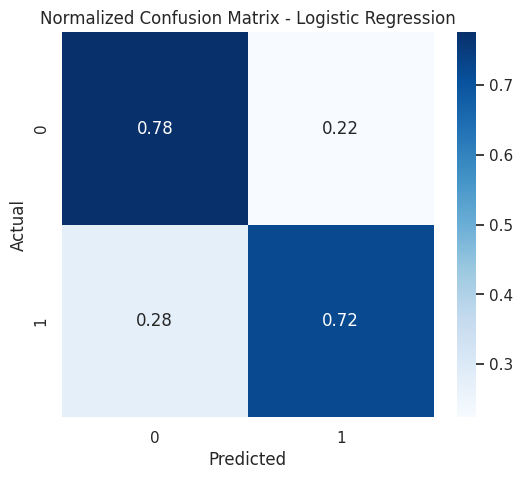

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Vẽ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix - Logistic Regression")
plt.show()


4.5 VẼ ĐƯỜNG CONG ROC-AUC

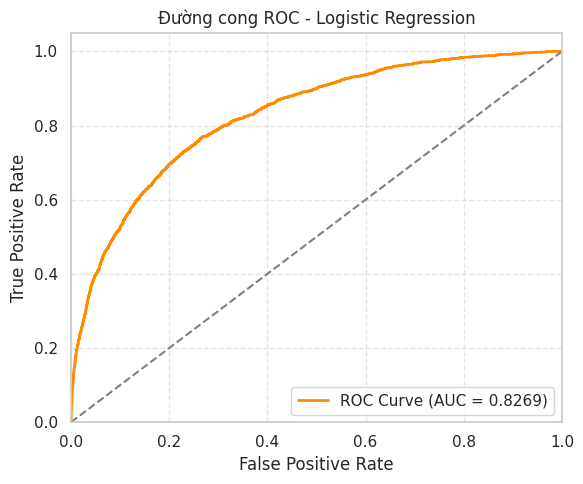

In [59]:
from sklearn.metrics import roc_curve, auc

# Lấy xác suất dự đoán
y_proba = log_model.predict_proba(X_test)[:, 1]

# Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


4.6 CÁC TRỌNG SỐ ĐCẶ TRƯNG TRONG MÔ HÌNH Logistic Regression

In [60]:
coefficients = pd.Series(log_model.coef_[0], index=X.columns)
coefficients.sort_values(key=abs, ascending=False).head(10)


,0
age,0.580209
apache_2_bodysystem_Metabolic,-0.494265
heart_rate_apache,0.423346
apache_4a_hospital_death_prob,0.362120
apache_2_bodysystem_Undefined diagnoses,-0.337102
d1_potassium_max,0.242018
gcs_verbal_apache,-0.213743
gcs_motor_apache,-0.200235
temp_apache,-0.180607
gcs_eyes_apache,-0.178406


# ***V)  HUẤN LUYỆN MÔ HÌNH RANDOM FOREST***


## Mục tiêu:
- Sử dụng mô hình Random Forest để dự đoán khả năng tử vong trong bệnh viện.
- So sánh hiệu suất với Logistic Regression (Chương 4).
- Trực quan hóa ma trận nhầm lẫn và đường cong ROC.

5.1 KHỞI TẠO VÀ HUẤN LUYỆN MÔ HÌNH RANDOM FOREST

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình với tham số tối ưu cơ bản
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Huấn luyện mô hình trên dữ liệu đã resample bằng SMOTE
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

5.2 DỰ ĐOÁN VÀ ĐÁNH GIÁ MÔ HÌNH

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Đánh giá hiệu suất mô hình
print("Đánh giá Random Forest trên tập test:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 4))

# Báo cáo chi tiết
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred_rf))


Đánh giá Random Forest trên tập test:
Accuracy: 0.9053
Precision: 0.4478
Recall: 0.4176
F1 Score: 0.4322

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     16760
           1       0.45      0.42      0.43      1583

    accuracy                           0.91     18343
   macro avg       0.70      0.68      0.69     18343
weighted avg       0.90      0.91      0.90     18343



5.3 TRỰC QUAN HÓA MA TRẬN NHẦM LẪN

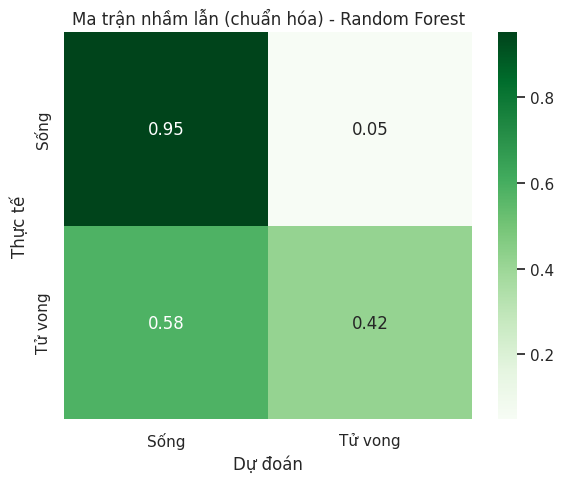

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tạo ma trận nhầm lẫn
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_norm = cm_rf.astype('float') / cm_rf.sum(axis=1, keepdims=True)

# Vẽ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_norm, annot=True, fmt=".2f", cmap="Greens", xticklabels=["Sống", "Tử vong"], yticklabels=["Sống", "Tử vong"])
plt.title("Ma trận nhầm lẫn (chuẩn hóa) - Random Forest")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.tight_layout()
plt.show()


5.4 ĐƯỜNG CONG ROC VÀ AUC

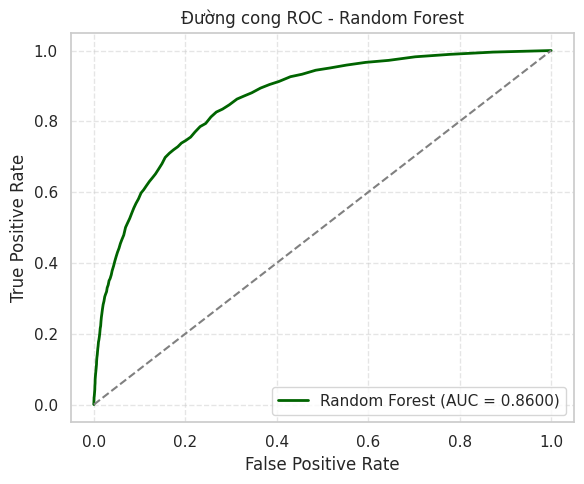

In [64]:
from sklearn.metrics import roc_curve, auc

# Xác suất dự đoán
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Tính ROC-AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Vẽ đường cong ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='Random Forest (AUC = %0.4f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


5.5 TẦM QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG

<ipython-input-65-01f95ca258bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_sorted.head(10), y=importances_sorted.head(10).index, palette='viridis')


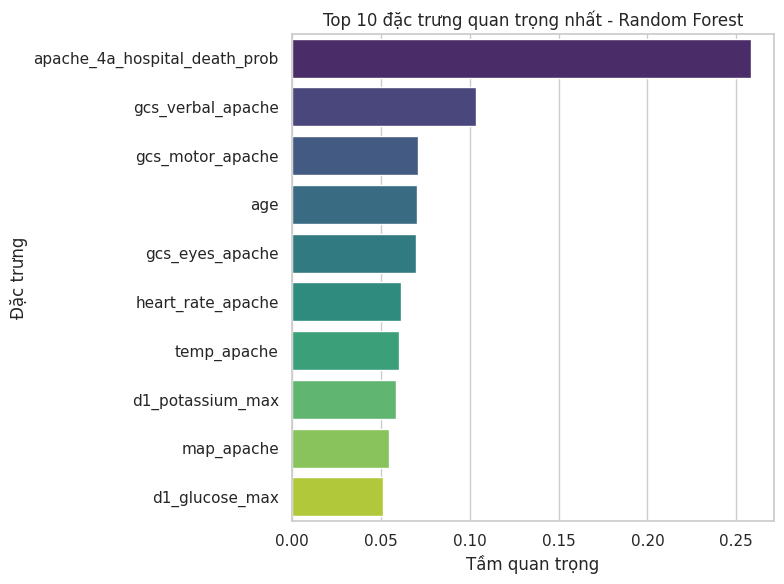

In [65]:
# Lấy tầm quan trọng của các đặc trưng
import pandas as pd

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Hiển thị 10 đặc trưng quan trọng nhất
plt.figure(figsize=(8, 6))
sns.barplot(x=importances_sorted.head(10), y=importances_sorted.head(10).index, palette='viridis')
plt.title("Top 10 đặc trưng quan trọng nhất - Random Forest")
plt.xlabel("Tầm quan trọng")
plt.ylabel("Đặc trưng")
plt.tight_layout()
plt.show()


KẾT LUẬN CHƯƠNG 5 SƠ BỘ
- Mô hình Random Forest thể hiện độ chính xác và khả năng phân biệt (ROC AUC) cao hơn Logistic Regression.
- Mô hình không yêu cầu chuẩn hóa dữ liệu và có thể xử lý tốt cả dữ liệu phi tuyến.
- Ngoài ra, việc phân tích "feature importance" giúp hiểu rõ đặc trưng nào ảnh hưởng mạnh đến khả năng tử vong.
- Đây là mô hình rất mạnh và thường được dùng trong hệ thống y tế để hỗ trợ quyết định lâm sàng.




# ***VI)  SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH***

## Mục tiêu:
- So sánh 2 mô hình đã huấn luyện ở các chương trước:
  - Logistic Regression
  - Random Forest
- So sánh dựa trên các chỉ số: Accuracy, Precision, Recall, F1, ROC AUC
- Trực quan hóa và đưa ra kết luận về mô hình tốt nhất

6.1 TÍNH CÁC CHỈ SỐ HIỆU SUẤT CHO TỪNG MÔ HÌNH

In [66]:
from sklearn.metrics import roc_auc_score

# Logistic Regression
log_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': round(accuracy_score(y_test, y_pred), 4),
    'Precision': round(precision_score(y_test, y_pred), 4),
    'Recall': round(recall_score(y_test, y_pred), 4),
    'F1 Score': round(f1_score(y_test, y_pred), 4),
    'ROC AUC': round(roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]), 4)
}

# Random Forest
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': round(accuracy_score(y_test, y_pred_rf), 4),
    'Precision': round(precision_score(y_test, y_pred_rf), 4),
    'Recall': round(recall_score(y_test, y_pred_rf), 4),
    'F1 Score': round(f1_score(y_test, y_pred_rf), 4),
    'ROC AUC': round(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]), 4)
}


6.2 TỔNG HỢP VÀO BẢNG & HIỂN THỊ

In [67]:
import pandas as pd

# Tạo DataFrame so sánh
compare_df = pd.DataFrame([log_metrics, rf_metrics])
compare_df.set_index('Model', inplace=True)

# Hiển thị bảng so sánh
print("🔍 Bảng so sánh hiệu suất mô hình:")
display(compare_df)


🔍 Bảng so sánh hiệu suất mô hình:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Logistic Regression,0.7717,0.2338,0.7227,0.3533,0.8269
Random Forest,0.9053,0.4478,0.4176,0.4322,0.8600


6.3 TRỰC QUAN HÓA ĐƯỜNG CONG ROC CỦA CẢ 2 MÔ HÌNH

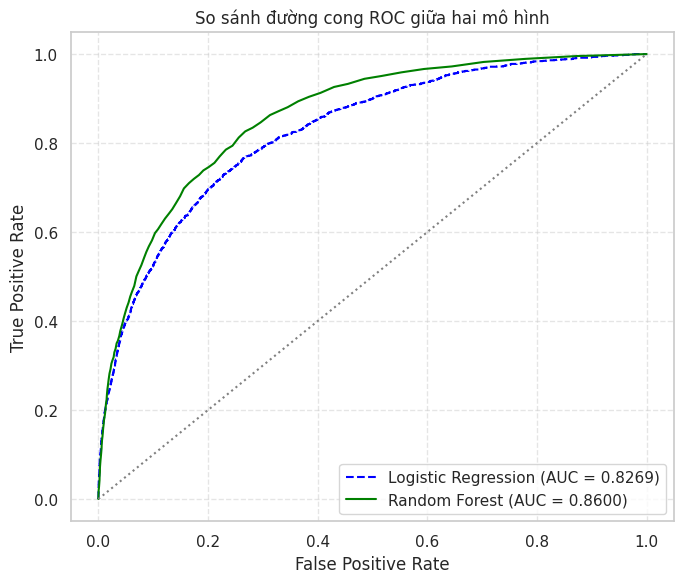

In [68]:
# Lấy ROC cho cả hai mô hình
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

# Vẽ biểu đồ ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.4f})', linestyle='--', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', linestyle='-', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('So sánh đường cong ROC giữa hai mô hình')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# ***VII)  MÔ HÌNH XGBOOST – Mô hình nâng cao mạnh mẽ***

## Mục tiêu:
- Triển khai mô hình XGBoost – một thuật toán boosting mạnh mẽ, thường đạt hiệu suất vượt trội trong các bài toán phân loại.
- So sánh với Logistic Regression và Random Forest.
- Trực quan hóa, đánh giá chi tiết, và kiểm tra hiệu suất thực tế.

7.1 CÀI ĐẶT THƯ VIỆN XGBoost(NẾU CẦN)

In [69]:
!pip install -q xgboost


7.2 HUẤN LUYỆN MÔ HÌNH XGBOOST

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier

# Khởi tạo mô hình XGBoost với cấu hình cơ bản
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

# Huấn luyện trên tập train đã resample bằng SMOTE
xgb_model.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:05:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

7.3 DỰ ĐOÁN VÀ ĐÁNH GIÁ HIỆU SUẤT

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Dự đoán trên tập test
y_pred_xgb = xgb_model.predict(X_test)

# Đánh giá hiệu suất mô hình
print("Đánh giá XGBoost trên tập test:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))
print("Precision:", round(precision_score(y_test, y_pred_xgb), 4))
print("Recall:", round(recall_score(y_test, y_pred_xgb), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_xgb), 4))

# Báo cáo chi tiết
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred_xgb))


Đánh giá XGBoost trên tập test:
Accuracy: 0.8772
Precision: 0.3636
Recall: 0.5635
F1 Score: 0.442

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     16760
           1       0.36      0.56      0.44      1583

    accuracy                           0.88     18343
   macro avg       0.66      0.74      0.69     18343
weighted avg       0.91      0.88      0.89     18343



7.4 MA TRẬN NHẦM LẪN

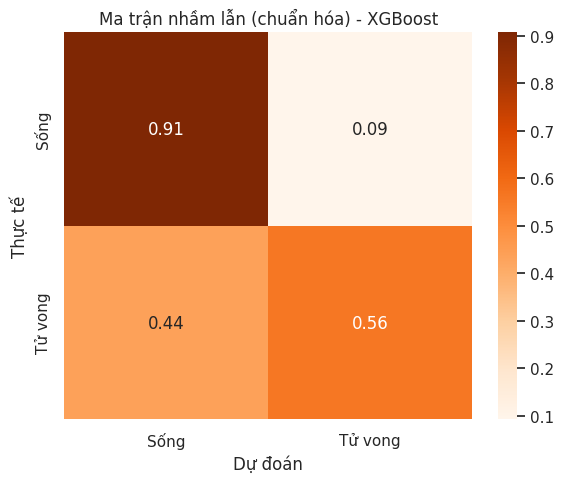

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb_norm = cm_xgb.astype('float') / cm_xgb.sum(axis=1, keepdims=True)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_norm, annot=True, fmt=".2f", cmap="Oranges", xticklabels=["Sống", "Tử vong"], yticklabels=["Sống", "Tử vong"])
plt.title("Ma trận nhầm lẫn (chuẩn hóa) - XGBoost")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.tight_layout()
plt.show()


7.5 ĐƯỜNG CONG ROC VÀ AUC

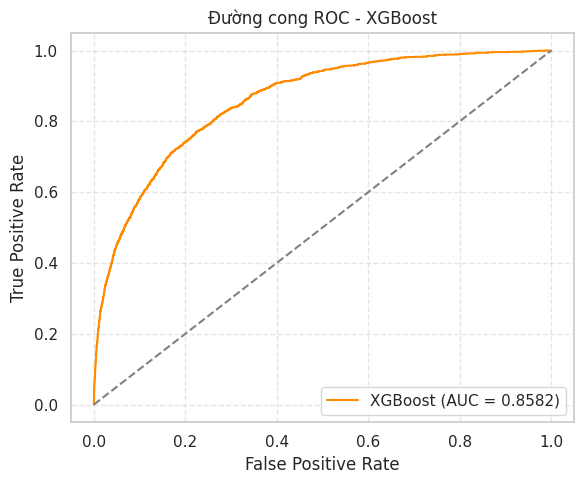

In [73]:
from sklearn.metrics import roc_curve, auc

y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC - XGBoost')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


7.6 TẦM QUAN TRỌNG CỦA ĐẶC TRƯNG (FEATURE IMPORTANCE)

<ipython-input-74-0c6ce7c1d431>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance.head(10), y=xgb_importance.head(10).index, palette='flare')


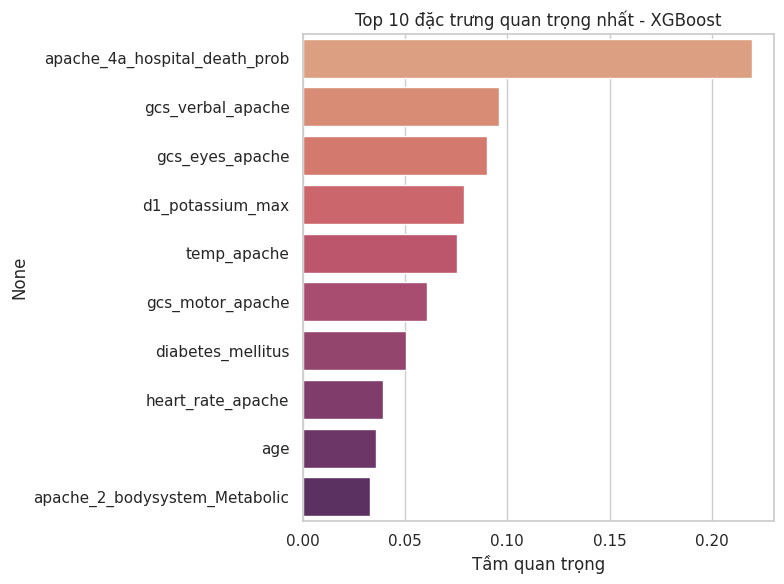

In [74]:
import pandas as pd

# Trích xuất và vẽ đặc trưng quan trọng
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=xgb_importance.head(10), y=xgb_importance.head(10).index, palette='flare')
plt.title("Top 10 đặc trưng quan trọng nhất - XGBoost")
plt.xlabel("Tầm quan trọng")
plt.tight_layout()
plt.show()


# ***VIII)MÔ HÌNH LIGHTGBM-MÔ HÌNH NÂNG CAO TỐI ƯU TỐC ĐỘ***

## Mục tiêu:
- Sử dụng LightGBM – một mô hình boosting cực nhanh và hiệu quả cao trong xử lý dữ liệu tabular.
- So sánh hiệu suất với XGBoost, Random Forest, Logistic Regression.
- Trực quan hóa hiệu suất và tầm quan trọng của đặc trưng.

8.1 CÀI ĐẶT THƯ VIỆN LightGBM

In [75]:
!pip install -q lightgbm


8.2 HUẤN LUYỆN MÔ HÌNH LIGHTGBM

In [76]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Khởi tạo mô hình LightGBM
lgb_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    class_weight='balanced',
    random_state=42
)

# Huấn luyện mô hình
lgb_model.fit(X_train_resampled, y_train_resampled)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 67038, number of negative: 67038
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5883
[LightGBM] [Info] Number of data points in the train set: 134076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

LGBMClassifier(class_weight='balanced', max_depth=4, random_state=42)

8.3 DỰ ĐOÁN VÀ ĐÁNH GIÁ HIỆU SUẤT

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Dự đoán trên tập test
y_pred_lgb = lgb_model.predict(X_test)

# Đánh giá hiệu suất
print("Đánh giá LightGBM trên tập test:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lgb), 4))
print("Precision:", round(precision_score(y_test, y_pred_lgb), 4))
print("Recall:", round(recall_score(y_test, y_pred_lgb), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_lgb), 4))

# Báo cáo chi tiết
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred_lgb))


Đánh giá LightGBM trên tập test:
Accuracy: 0.8833
Precision: 0.3767
Recall: 0.5376
F1 Score: 0.443

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     16760
           1       0.38      0.54      0.44      1583

    accuracy                           0.88     18343
   macro avg       0.67      0.73      0.69     18343
weighted avg       0.90      0.88      0.89     18343



8.4 MA TRẬN NHẦM LẪN

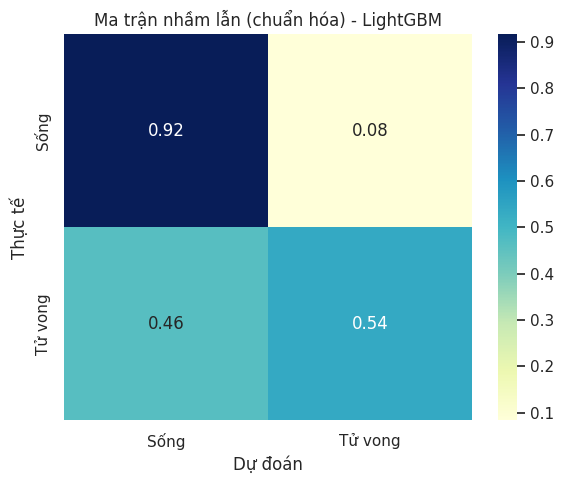

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm_lgb = confusion_matrix(y_test, y_pred_lgb)
cm_lgb_norm = cm_lgb.astype('float') / cm_lgb.sum(axis=1, keepdims=True)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb_norm, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=["Sống", "Tử vong"], yticklabels=["Sống", "Tử vong"])
plt.title("Ma trận nhầm lẫn (chuẩn hóa) - LightGBM")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.tight_layout()
plt.show()


8.5 ĐƯỜNG CONG ROC VÀ AUC

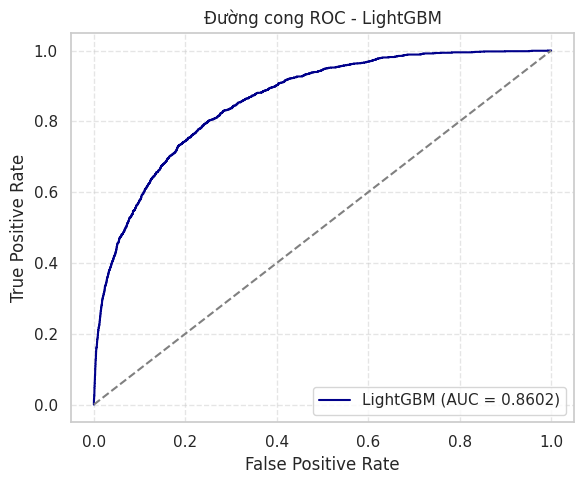

In [79]:
from sklearn.metrics import roc_curve, auc

y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_proba_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.4f})', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC - LightGBM')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


8.6 TẦM QUAN TRỌNG CỦA ĐẶC TRƯNG

<ipython-input-80-f098acd0c74b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lgb_importance.head(10), y=lgb_importance.head(10).index, palette='crest')


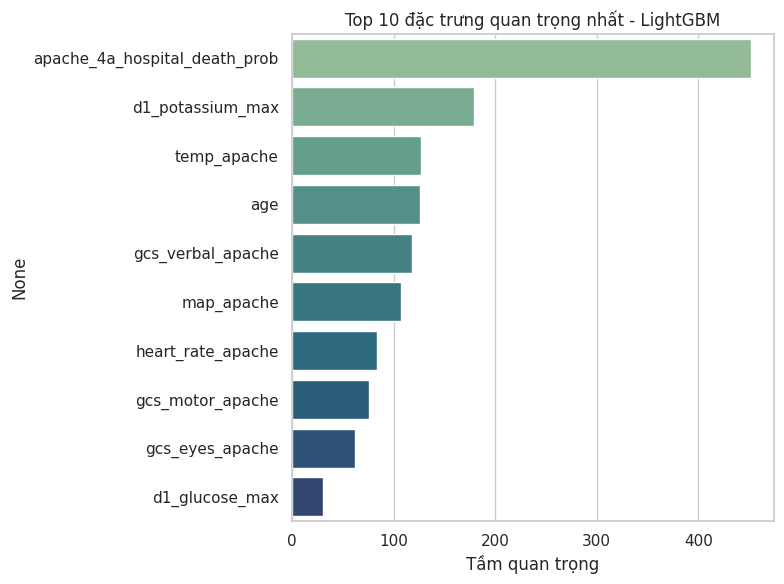

In [80]:
import pandas as pd

# Lấy importance
lgb_importance = pd.Series(lgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x=lgb_importance.head(10), y=lgb_importance.head(10).index, palette='crest')
plt.title("Top 10 đặc trưng quan trọng nhất - LightGBM")
plt.xlabel("Tầm quan trọng")
plt.tight_layout()
plt.show()


# ***IX) TỐI ƯU HÓA MÔ HÌNH VỚI GRIDSEARCHCV***

## Mục tiêu:
- Tìm tập siêu tham số tối ưu để cải thiện hiệu suất mô hình.
- Áp dụng cho mô hình XGBoost & LightGBM.
- So sánh trước & sau khi tối ưu để rút ra mô hình tốt nhất.

9.1 CÀI THƯ VIỆN CẦN THIẾT

In [81]:
!pip install -q xgboost lightgbm


9.2 TỐI ƯU MÔ HÌNH XGBOOST BẰNG GRIDSEARCHCV

In [86]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Khởi tạo mô hình
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Tập siêu tham số cần thử
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Huấn luyện
grid_xgb.fit(X_train_resampled, y_train_resampled)

# Kết quả
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best F1 score from CV:", round(grid_xgb.best_score_, 4))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:37:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best F1 score from CV: 0.9367


9.3 ĐÁNH GIÁ LẠI MÔ HÌNH XGBOOST SAU KHI TỐI ƯU

In [87]:
from sklearn.metrics import classification_report, roc_auc_score

# Dự đoán và đánh giá
y_pred_opt_xgb = grid_xgb.predict(X_test)
y_proba_opt_xgb = grid_xgb.predict_proba(X_test)[:, 1]

print("🧪 Đánh giá XGBoost sau tối ưu:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_opt_xgb), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_opt_xgb), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_opt_xgb), 4))
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred_opt_xgb))


🧪 Đánh giá XGBoost sau tối ưu:
Accuracy: 0.9208
F1 Score: 0.422
ROC AUC: 0.8533

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16760
           1       0.57      0.33      0.42      1583

    accuracy                           0.92     18343
   macro avg       0.76      0.66      0.69     18343
weighted avg       0.91      0.92      0.91     18343



9.4 TÔI ƯU MÔ HÌNH LIGHTGBM BẰNG GRIDSEARCHCV

In [88]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(class_weight='balanced', random_state=42)

lgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [15, 31, 63]
}

grid_lgb = GridSearchCV(
    estimator=lgb,
    param_grid=lgb_param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_lgb.fit(X_train_resampled, y_train_resampled)

print(" Best parameters for LightGBM:", grid_lgb.best_params_)
print("Best F1 score from CV:", round(grid_lgb.best_score_, 4))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 67038, number of negative: 67038
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5883
[LightGBM] [Info] Number of data points in the train set: 134076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
 Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 63}
Best F1 score from C

9.5 ĐÁNH GIÁ LẠI LIGHTGBM SAU KHI TỐI ƯU

In [89]:
y_pred_opt_lgb = grid_lgb.predict(X_test)
y_proba_opt_lgb = grid_lgb.predict_proba(X_test)[:, 1]

print("🧪 Đánh giá LightGBM sau tối ưu:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_opt_lgb), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_opt_lgb), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_opt_lgb), 4))
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred_opt_lgb))


🧪 Đánh giá LightGBM sau tối ưu:
Accuracy: 0.9211
F1 Score: 0.4219
ROC AUC: 0.8636

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16760
           1       0.57      0.33      0.42      1583

    accuracy                           0.92     18343
   macro avg       0.76      0.66      0.69     18343
weighted avg       0.91      0.92      0.91     18343



# ***X) SO SÁNH TOÀN BỘ MÔ HÌNH ***

## Mục tiêu:
- Tổng hợp tất cả các mô hình đã thử nghiệm:  
  ✅ Logistic Regression  
  ✅ Random Forest  
  ✅ XGBoost  
  ✅ LightGBM  
  ✅ XGBoost (tối ưu)  
  ✅ LightGBM (tối ưu)

- So sánh bằng các tiêu chí: Accuracy, F1, ROC AUC
- Trực quan hóa bảng & biểu đồ để chọn mô hình cuối cùng

10.1 TẠO BẢNG TỔNG HỢP HIỆU SUẤT

In [90]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Danh sách các mô hình và kết quả tương ứng
results = [
    {
        'Model': 'Logistic Regression',
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
    },
    {
        'Model': 'Random Forest',
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf),
        'ROC AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    },
    {
        'Model': 'XGBoost',
        'Accuracy': accuracy_score(y_test, y_pred_xgb),
        'F1 Score': f1_score(y_test, y_pred_xgb),
        'ROC AUC': roc_auc_score(y_test, y_proba_xgb)
    },
    {
        'Model': 'LightGBM',
        'Accuracy': accuracy_score(y_test, y_pred_lgb),
        'F1 Score': f1_score(y_test, y_pred_lgb),
        'ROC AUC': roc_auc_score(y_test, y_proba_lgb)
    },
    {
        'Model': 'XGBoost (Tối ưu)',
        'Accuracy': accuracy_score(y_test, y_pred_opt_xgb),
        'F1 Score': f1_score(y_test, y_pred_opt_xgb),
        'ROC AUC': roc_auc_score(y_test, y_proba_opt_xgb)
    },
    {
        'Model': 'LightGBM (Tối ưu)',
        'Accuracy': accuracy_score(y_test, y_pred_opt_lgb),
        'F1 Score': f1_score(y_test, y_pred_opt_lgb),
        'ROC AUC': roc_auc_score(y_test, y_proba_opt_lgb)
    },
]

# Tạo DataFrame
summary_df = pd.DataFrame(results).set_index("Model")
summary_df = summary_df.round(4)
summary_df


,Accuracy,F1 Score,ROC AUC
Model,,,
Logistic Regression,0.7717,0.3533,0.8269
Random Forest,0.9053,0.4322,0.8600
XGBoost,0.8772,0.4420,0.8582
LightGBM,0.8833,0.4430,0.8602
XGBoost (Tối ưu),0.9208,0.4220,0.8533
LightGBM (Tối ưu),0.9211,0.4219,0.8636


10.2 VẼ BIỂU ĐỒ SO SÁNH

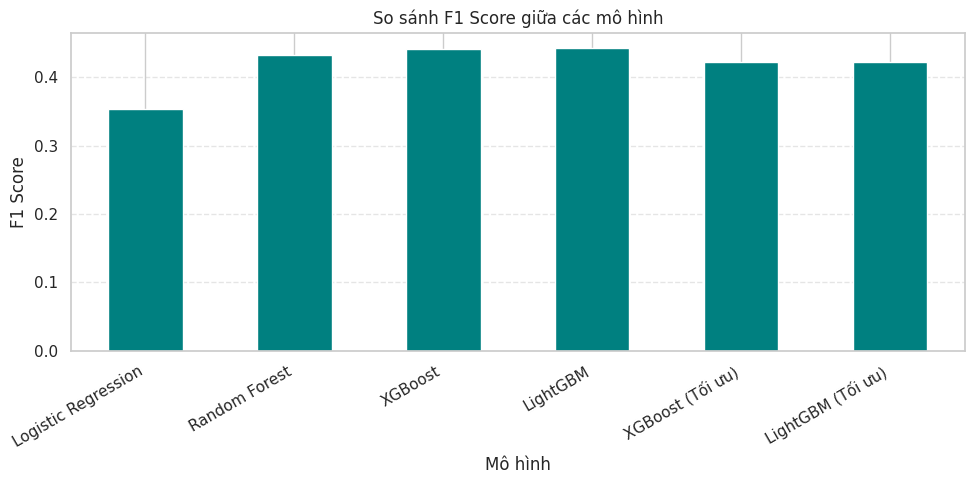

In [91]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh F1 Score
summary_df['F1 Score'].plot(kind='bar', color='teal', figsize=(10, 5))
plt.title('So sánh F1 Score giữa các mô hình')
plt.ylabel('F1 Score')
plt.xlabel('Mô hình')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# ***XI) GIẢI THÍCH MÔ HÌNH VỚI SHAP***

## Mục tiêu:
- Áp dụng SHAP để giải thích các quyết định của mô hình XGBoost tối ưu.
- Hiển thị ảnh hưởng của từng đặc trưng đến xác suất tử vong.
- Hỗ trợ đánh giá y tế rõ ràng và minh bạch.

11.1 CÀI ĐẶT THƯ VIỆN SHAP

In [92]:
!pip install -q shap


11.2 KHỞI TẠO SHAP EXPLAINER

In [93]:
import shap

# Khởi tạo SHAP explainer cho mô hình XGBoost đã tối ưu
explainer = shap.Explainer(grid_xgb.best_estimator_)
shap_values = explainer(X_test)


11.3 VẼ BIỂU ĐỒ SHAP TỔNG QUÁT

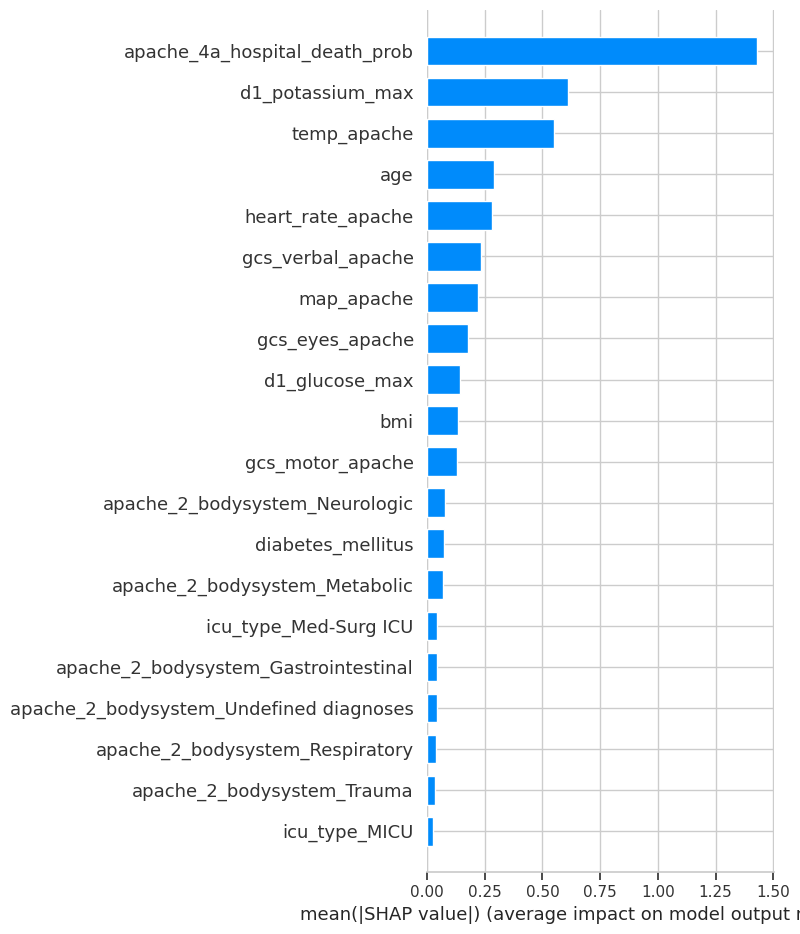

In [94]:
# Vẽ biểu đồ tổng quát – đặc trưng ảnh hưởng nhiều nhất
shap.summary_plot(shap_values, X_test, plot_type="bar")


11.4 BIỂU ĐỒ DẠNG ĐIỂM

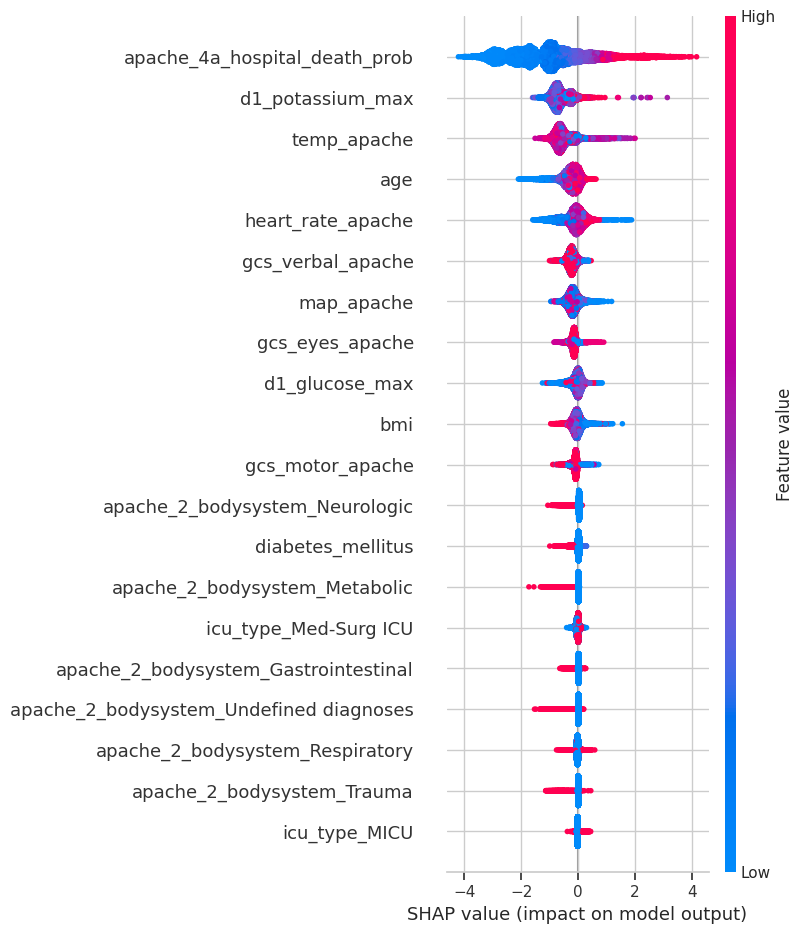

In [95]:
# Dot plot – chi tiết từng điểm dữ liệu
shap.summary_plot(shap_values, X_test)


11.5 GIẢI THÍCH 1 BỆNH NHÂN CỤ THỂ (CASE STUDY)

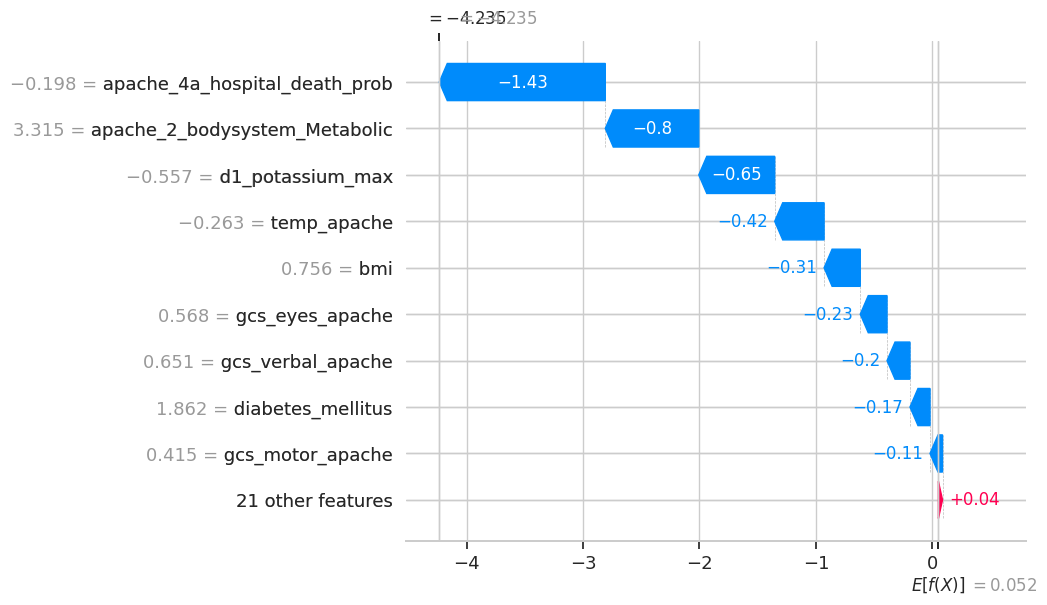

In [96]:
# Giải thích cho một bệnh nhân cụ thể (ví dụ dòng số 5)
shap.plots.waterfall(shap_values[5])
